In [ ]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

Mounted at /content/drive


In [ ]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/BNB-USD (BaoCao).csv')
df1=df.reset_index()['Close']

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(60, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 50ms/step - loss: 0.0353
Epoch 2/100
20/20 [==============================] - 1s 49ms/step - loss: 0.0032
Epoch 3/100
20/20 [==============================] - 1s 47ms/step - loss: 0.0010
Epoch 4/100
20/20 [==============================] - 1s 48ms/step - loss: 8.6408e-04
Epoch 5/100
20/20 [==============================] - 1s 48ms/step - loss: 8.1927e-04
Epoch 6/100
20/20 [==============================] - 1s 67ms/step - loss: 7.8127e-04
Epoch 7/100
20/20 [==============================] - 2s 80ms/step - loss: 7.6206e-04
Epoch 8/100
20/20 [==============================] - 2s 81ms/step - loss: 7.3457e-04
Epoch 9/100
20/20 [==============================] - 2s 81ms/step - loss: 7.3711e-04
Epoch 10/100
20/20 [==============================] - 1s 48ms/step - loss: 7.1348e-04
Epoch 11/100
20/20 [==============================] - 1s 48ms/step - loss: 6.9105e-04
Epoch 12/100
20/20 [==============================] - 1s 50ms/step - loss: 

In [ ]:
# 10. Dự đoán trên tập train và test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 12ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [ ]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mse = np.mean((np.array(ytest) - np.array(y_pred))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 348.7509224203798
Testing MAPE: 76466.79547702849
Testing MSE: 121627.20588906578


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.54920325 0.55884414 0.56906318 0.58871229 0.57873439 0.60991559
 0.58591298 0.59796771 0.60273301 0.60782863 0.61481403 0.57823327
 0.62978711 0.69924355 0.71845946 0.72066216 0.78041459 0.77042396
 0.79315809 0.93227844 0.89089661 0.93564248 0.85155461 0.84301543
 0.81820905 0.74694881 0.82142588 0.81624461 0.8140389  0.81419041
 0.83837673 0.86754205 0.85662036 0.84815731 0.8613035  0.90540851
 0.88793645 0.89677975 0.85098648 0.81239233 0.82940903 0.86456128
 0.85484399 0.86534962 0.86255113 0.86675161 0.85764064 0.90154532
 0.89375583 0.88097825 0.81782285 0.83721153 0.81568373 0.79310349
 0.78798066 0.81462955 0.81870755 0.84282773 0.85582406 0.89477894
 0.8966777  0.89854696 0.9074302  0.88296733 0.8799883  0.88651788
 0.87565198 0.85412527 0.82849135 0.82716841 0.86691594 0.86516916
 0.87461512 0.86911543 0.85262169 0.86869745 0.88045575 0.86483242
 0.87444629 0.87804328 0.8738145  0.83644398 0.8595077  0.84017087
 0.85816297 0.85711658 0.84833749 0.88733608 0.914

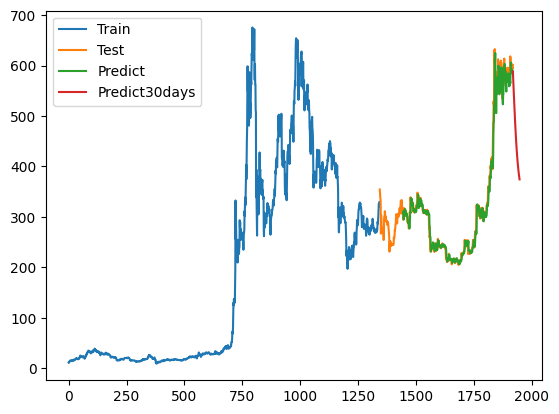

In [ ]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [ ]:
x_input.shape

(1, 100, 1)

In [ ]:
train_size_82 = int(0.8 * len(df1))
test_size_82 = len(df1) - train_size_82
train_data_82 = df1[:train_size_82]
test_data_82 = df1[train_size_82:train_size_82+test_size_82]

In [ ]:
X_train_82, y_train_82 = create_dataset(train_data_82, time_step)
X_test_82, ytest_82 = create_dataset(test_data_82, time_step)

In [ ]:
X_train_82 =X_train_82.reshape(X_train_82.shape[0],X_train_82.shape[1] , 1)
X_test_82 = X_test_82.reshape(X_test_82.shape[0],X_test_82.shape[1] , 1)

In [ ]:
model.fit(X_train_82,y_train_82,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 52ms/step - loss: 4.7599e-04
Epoch 2/100
23/23 [==============================] - 1s 49ms/step - loss: 5.0822e-04
Epoch 3/100
23/23 [==============================] - 1s 50ms/step - loss: 4.9000e-04
Epoch 4/100
23/23 [==============================] - 1s 49ms/step - loss: 4.7040e-04
Epoch 5/100
23/23 [==============================] - 1s 49ms/step - loss: 4.8754e-04
Epoch 6/100
23/23 [==============================] - 1s 50ms/step - loss: 4.8290e-04
Epoch 7/100
23/23 [==============================] - 2s 79ms/step - loss: 4.7381e-04
Epoch 8/100
23/23 [==============================] - 2s 79ms/step - loss: 4.9592e-04
Epoch 9/100
23/23 [==============================] - 2s 79ms/step - loss: 4.9367e-04
Epoch 10/100
23/23 [==============================] - 1s 49ms/step - loss: 4.9567e-04
Epoch 11/100
23/23 [==============================] - 1s 50ms/step - loss: 4.7546e-04
Epoch 12/100
23/23 [==============================] - 1s 49ms/s

In [ ]:
train_predict_82=model.predict(X_train_82)
y_pred_82=model.predict(X_test_82)

9/9 [==============================] - 0s 18ms/step


In [ ]:
train_predict_82=scaler.inverse_transform(train_predict_82)
y_pred_82=scaler.inverse_transform(y_pred_82)

In [ ]:
test_82_rmse = np.sqrt(np.mean((y_pred_82 - ytest_82)**2))
test_82_mape = np.mean(np.abs((ytest_82 - y_pred_82) / ytest_82)) * 100
test_82_mse = np.mean((np.array(ytest_82) - np.array(y_pred_82))**2)
print('Testing RMSE:', test_82_rmse)
print('Testing MAPE:', test_82_mape)
print('Testing MSE:', test_82_mse)

Testing RMSE: 383.3077871210104
Testing MAPE: 79418.43514852587
Testing MSE: 146924.8596676058


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54920325 0.55884414 0.56906318 0.58871229 0.57873439 0.60991559
 0.58591298 0.59796771 0.60273301 0.60782863 0.61481403 0.57823327
 0.62978711 0.69924355 0.71845946 0.72066216 0.78041459 0.77042396
 0.79315809 0.93227844 0.89089661 0.93564248 0.85155461 0.84301543
 0.81820905 0.74694881 0.82142588 0.81624461 0.8140389  0.81419041
 0.83837673 0.86754205 0.85662036 0.84815731 0.8613035  0.90540851
 0.88793645 0.89677975 0.85098648 0.81239233 0.82940903 0.86456128
 0.85484399 0.86534962 0.86255113 0.86675161 0.85764064 0.90154532
 0.89375583 0.88097825 0.81782285 0.83721153 0.81568373 0.79310349
 0.78798066 0.81462955 0.81870755 0.84282773 0.85582406 0.89477894
 0.8966777  0.89854696 0.9074302  0.88296733 0.8799883  0.88651788
 0.87565198 0.85412527 0.82849135 0.82716841 0.86691594 0.86516916
 0.87461512 0.86911543 0.85262169 0.86869745 0.88045575 0.86483242
 0.87444629 0.87804328 0.8738145  0.83644398 0.8595077  0.84017087
 0.85816297 0.85711658 0.84833749 0.88733608 0.914

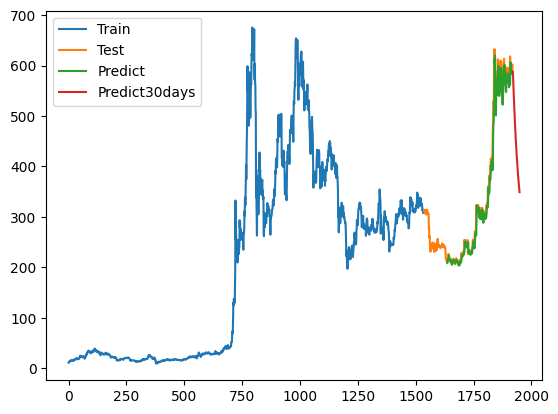

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_82, step=1)
plt.plot(scaler.inverse_transform(train_data_82))
test_data_index = pd.RangeIndex(start=train_size_82, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_82))
test_data_index = pd.RangeIndex(start=train_size_82+101, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,(y_pred_82))
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [ ]:
train_size_91 = int(0.9 * len(df1))
test_size_91 = len(df1) - train_size_91
train_data_91 = df1[:train_size_91]
test_data_91 = df1[train_size_91:train_size_91+test_size_91]

In [ ]:
X_train_91, y_train_91 = create_dataset(train_data_91, time_step)
X_test_91, ytest_91 = create_dataset(test_data_91, time_step)

In [ ]:
X_train_91 =X_train_91.reshape(X_train_91.shape[0],X_train_91.shape[1] , 1)
X_test_91 = X_test_91.reshape(X_test_91.shape[0],X_test_91.shape[1] , 1)

In [ ]:
model.fit(X_train_91,y_train_91,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 1s 52ms/step - loss: 4.2559e-04
Epoch 2/100
26/26 [==============================] - 1s 50ms/step - loss: 4.2218e-04
Epoch 3/100
26/26 [==============================] - 1s 49ms/step - loss: 4.1954e-04
Epoch 4/100
26/26 [==============================] - 1s 49ms/step - loss: 4.3297e-04
Epoch 5/100
26/26 [==============================] - 1s 50ms/step - loss: 4.2428e-04
Epoch 6/100
26/26 [==============================] - 2s 65ms/step - loss: 4.2556e-04
Epoch 7/100
26/26 [==============================] - 2s 80ms/step - loss: 4.3503e-04
Epoch 8/100
26/26 [==============================] - 2s 83ms/step - loss: 4.3345e-04
Epoch 9/100
26/26 [==============================] - 1s 49ms/step - loss: 4.4850e-04
Epoch 10/100
26/26 [==============================] - 1s 48ms/step - loss: 4.3213e-04
Epoch 11/100
26/26 [==============================] - 1s 49ms/step - loss: 4.2179e-04
Epoch 12/100
26/26 [==============================] - 1s 48ms/s

In [ ]:
train_predict_91=model.predict(X_train_91)
y_pred_91=model.predict(X_test_91)

3/3 [==============================] - 0s 12ms/step


In [ ]:
train_predict_91=scaler.inverse_transform(train_predict_91)
y_pred_91=scaler.inverse_transform(y_pred_91)

In [ ]:
test_91_rmse = np.sqrt(np.mean((y_pred_91 - ytest_91)**2))
test_91_mape = np.mean(np.abs((ytest_91 - y_pred_91) / ytest_91)) * 100
test_91_mse = np.mean((np.array(ytest_91) - np.array(y_pred_91))**2)
print('Testing RMSE:', test_91_rmse)
print('Testing MAPE:', test_91_mape)
print('Testing MSE:', test_91_mse)

Testing RMSE: 561.6346889993556
Testing MAPE: 67184.35509045965
Testing MSE: 315433.52388740284


In [ ]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54920325 0.55884414 0.56906318 0.58871229 0.57873439 0.60991559
 0.58591298 0.59796771 0.60273301 0.60782863 0.61481403 0.57823327
 0.62978711 0.69924355 0.71845946 0.72066216 0.78041459 0.77042396
 0.79315809 0.93227844 0.89089661 0.93564248 0.85155461 0.84301543
 0.81820905 0.74694881 0.82142588 0.81624461 0.8140389  0.81419041
 0.83837673 0.86754205 0.85662036 0.84815731 0.8613035  0.90540851
 0.88793645 0.89677975 0.85098648 0.81239233 0.82940903 0.86456128
 0.85484399 0.86534962 0.86255113 0.86675161 0.85764064 0.90154532
 0.89375583 0.88097825 0.81782285 0.83721153 0.81568373 0.79310349
 0.78798066 0.81462955 0.81870755 0.84282773 0.85582406 0.89477894
 0.8966777  0.89854696 0.9074302  0.88296733 0.8799883  0.88651788
 0.87565198 0.85412527 0.82849135 0.82716841 0.86691594 0.86516916
 0.87461512 0.86911543 0.85262169 0.86869745 0.88045575 0.86483242
 0.87444629 0.87804328 0.8738145  0.83644398 0.8595077  0.84017087
 0.85816297 0.85711658 0.84833749 0.88733608 0.914

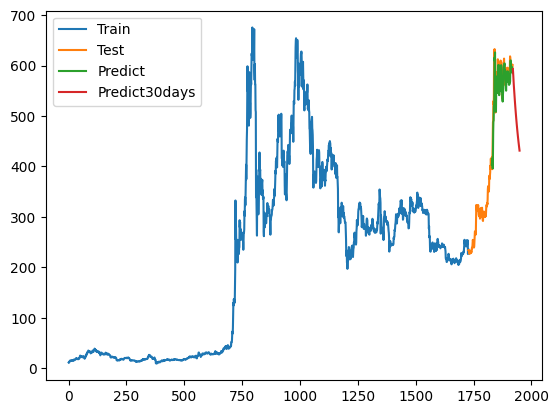

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_91, step=1)
plt.plot(scaler.inverse_transform(train_data_91))
test_data_index = pd.RangeIndex(start=train_size_91, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_91))
test_data_index = pd.RangeIndex(start=train_size_91+101, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,(y_pred_91))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()